## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 3. Load Data

In [2]:
# Set data directory - UPDATE THIS TO YOUR DATA PATH
data_dir = "../data"
print(f"Data directory set to: {data_dir}")

# Load features
features_df = pd.read_csv(f"{data_dir}/elliptic_bitcoin_dataset/elliptic_txs_features.csv", header=None)
print(f"Features shape: {features_df.shape}")
print(f"First few rows:")
features_df.head()

Data directory set to: ../data
Features shape: (203769, 167)
First few rows:


,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [4]:
# Load labels
labels_df = pd.read_csv(f"{data_dir}/elliptic_bitcoin_dataset/elliptic_txs_classes.csv")
print(f"Labels shape: {labels_df.shape}")
print(f"Column names: {labels_df.columns.tolist()}")
labels_df.head(10)

Labels shape: (203769, 2)
Column names: ['txId', 'class']


,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown
5,230459870,unknown
6,230333930,unknown
7,230595899,unknown
8,232013274,unknown
9,232029206,2


In [5]:
# Load edges (graph structure)
edges_df = pd.read_csv(f"{data_dir}/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv", header=None)
print(f"Edges shape: {edges_df.shape}")
print(f"First few edges (source, target):")
edges_df.head(10)

Edges shape: (234356, 2)
First few edges (source, target):


,0,1
0,txId1,txId2
1,230425980,5530458
2,232022460,232438397
3,230460314,230459870
4,230333930,230595899
5,232013274,232029206
6,232344069,27553029
7,36411953,230405052
8,34194980,5529846
9,3881097,232457116


## 4. Dataset Overview

In [6]:
# Basic stats
n_nodes = len(features_df)
n_edges = len(edges_df)
n_features = features_df.shape[1] - 1  # Exclude node ID column

print(f"\n=== Dataset Statistics ===")
print(f"Number of nodes (transactions): {n_nodes:,}")
print(f"Number of edges (relationships): {n_edges:,}")
print(f"Number of features: {n_features}")
print(f"Average degree: {2 * n_edges / n_nodes:.2f}")
print(f"Graph density: {2 * n_edges / (n_nodes * (n_nodes - 1)):.6f}")


=== Dataset Statistics ===
Number of nodes (transactions): 203,769
Number of edges (relationships): 234,356
Number of features: 166
Average degree: 2.30
Graph density: 0.000011


## 5. Class Distribution

In [9]:
# Class distribution
class_dist = labels_df['class'].value_counts()
class_dist_pct = labels_df['class'].value_counts(normalize=True) * 100

print("\n=== Class Distribution ===")
for class_name in ['1', '2', 'unknown']:
    count = (labels_df['class'] == class_name).sum()
    pct = (count / len(labels_df)) * 100
    print(f"{class_name:10s}: {count:6,} ({pct:5.2f}%)")


=== Class Distribution ===
1         :  4,545 ( 2.23%)
2         : 42,019 (20.62%)
unknown   : 157,205 (77.15%)


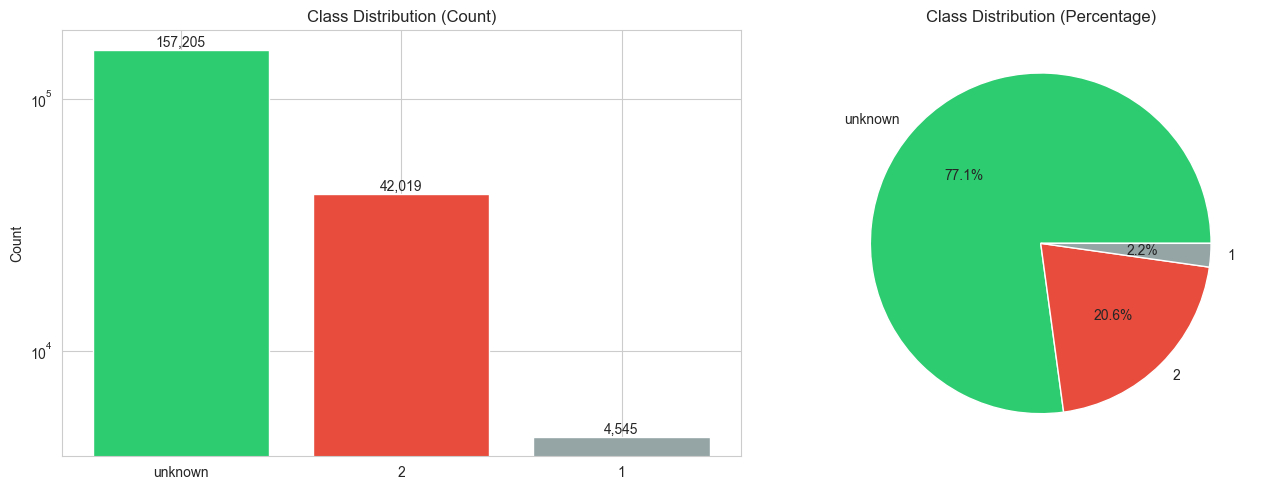


⚠️ Note: Severe class imbalance detected!
   Illicit:Unknown ratio = 1:inf


In [8]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
class_counts = labels_df['class'].value_counts()
axes[0].bar(class_counts.index, class_counts.values, color=['#2ecc71', '#e74c3c', '#95a5a6'])
axes[0].set_ylabel('Count')
axes[0].set_title('Class Distribution (Count)')
axes[0].set_yscale('log')
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom')

# Pie chart
colors = ['#2ecc71', '#e74c3c', '#95a5a6']
axes[1].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', colors=colors)
axes[1].set_title('Class Distribution (Percentage)')

plt.tight_layout()
plt.show()

print("\n⚠️ Note: Severe class imbalance detected!")
print(f"   Illicit:Unknown ratio = 1:{(labels_df['class'] == 'unknown').sum() / (labels_df['class'] == 'illicit').sum():.1f}")

## 6. Feature Analysis

In [10]:
# Extract features (exclude node ID column)
X = features_df.iloc[:, 1:].values
print(f"Feature matrix shape: {X.shape}")
print(f"\nFeature statistics:")
print(f"  Min value: {X.min():.4f}")
print(f"  Max value: {X.max():.4f}")
print(f"  Mean value: {X.mean():.4f}")
print(f"  Std deviation: {X.std():.4f}")
print(f"  Missing values: {pd.isna(X).sum()}")

Feature matrix shape: (203769, 166)

Feature statistics:
  Min value: -13.0934
  Max value: 289.2044
  Mean value: 0.1436
  Std deviation: 2.4052
  Missing values: 0


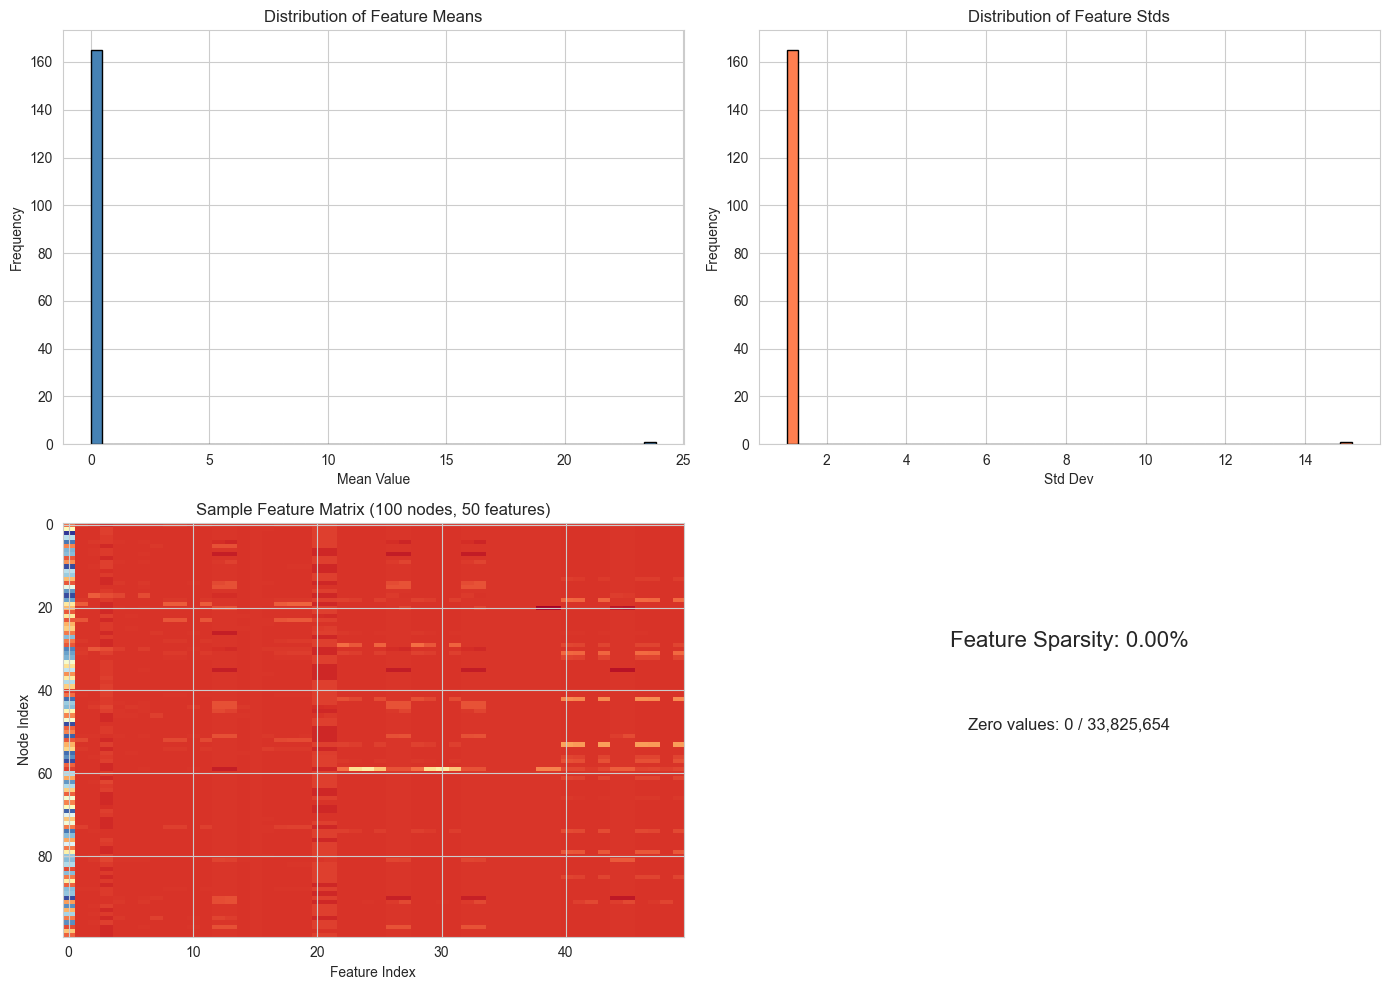

In [11]:
# Feature distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribution of feature means
feature_means = X.mean(axis=0)
axes[0, 0].hist(feature_means, bins=50, color='steelblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Feature Means')
axes[0, 0].set_xlabel('Mean Value')
axes[0, 0].set_ylabel('Frequency')

# Distribution of feature stds
feature_stds = X.std(axis=0)
axes[0, 1].hist(feature_stds, bins=50, color='coral', edgecolor='black')
axes[0, 1].set_title('Distribution of Feature Stds')
axes[0, 1].set_xlabel('Std Dev')
axes[0, 1].set_ylabel('Frequency')

# Sample of node features
sample_idx = np.random.randint(0, X.shape[0], 100)
axes[1, 0].imshow(X[sample_idx, :50], aspect='auto', cmap='RdYlBu')
axes[1, 0].set_title('Sample Feature Matrix (100 nodes, 50 features)')
axes[1, 0].set_xlabel('Feature Index')
axes[1, 0].set_ylabel('Node Index')

# Feature sparsity
sparsity = (X == 0).sum() / X.size
axes[1, 1].text(0.5, 0.7, f'Feature Sparsity: {sparsity:.2%}', 
                ha='center', fontsize=16, transform=axes[1, 1].transAxes)
axes[1, 1].text(0.5, 0.5, f'Zero values: {(X == 0).sum():,} / {X.size:,}', 
                ha='center', fontsize=12, transform=axes[1, 1].transAxes)
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

## 7. Graph Structure Analysis

In [12]:
# Node degree analysis
from collections import defaultdict

in_degree = defaultdict(int)
out_degree = defaultdict(int)

for _, row in edges_df.iterrows():
    source, target = int(row[0]), int(row[1])
    out_degree[source] += 1
    in_degree[target] += 1

all_nodes = set(range(1, n_nodes + 1))
in_deg_list = [in_degree.get(node, 0) for node in all_nodes]
out_deg_list = [out_degree.get(node, 0) for node in all_nodes]

print("\n=== Degree Statistics ===")
print(f"In-degree  - Min: {min(in_deg_list)}, Max: {max(in_deg_list)}, Mean: {np.mean(in_deg_list):.2f}")
print(f"Out-degree - Min: {min(out_deg_list)}, Max: {max(out_deg_list)}, Mean: {np.mean(out_deg_list):.2f}")

ValueError: invalid literal for int() with base 10: 'txId1'

In [ ]:
# Degree distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# In-degree distribution
axes[0].hist(in_deg_list, bins=100, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('In-Degree Distribution')
axes[0].set_xlabel('In-Degree')
axes[0].set_ylabel('Number of Nodes')
axes[0].set_yscale('log')

# Out-degree distribution
axes[1].hist(out_deg_list, bins=100, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_title('Out-Degree Distribution')
axes[1].set_xlabel('Out-Degree')
axes[1].set_ylabel('Number of Nodes')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

## 8. Transaction Types Analysis

In [14]:
# Analyze which transactions are labeled
labeled_indices = set(labels_df['txId'].values)
print(f"\n=== Labeling Coverage ===")
print(f"Total nodes: {n_nodes:,}")
print(f"Labeled nodes: {len(labeled_indices):,} ({len(labeled_indices)/n_nodes*100:.2f}%)")
print(f"Unlabeled nodes: {n_nodes - len(labeled_indices):,}")

# Coverage by class
print(f"\n=== Labeled Nodes by Class ===")
for class_name in ['1', '2']:
    count = (labels_df['class'] == class_name).sum()
    pct = (count / n_nodes) * 100
    print(f"{class_name:10s}: {count:6,} ({pct:5.2f}% of all nodes)")


=== Labeling Coverage ===
Total nodes: 203,769
Labeled nodes: 203,769 (100.00%)
Unlabeled nodes: 0

=== Labeled Nodes by Class ===
1         :  4,545 ( 2.23% of all nodes)
2         : 42,019 (20.62% of all nodes)


## 9. Summary & Key Insights

In [16]:
print("\n" + "="*60)
print("KEY INSIGHTS FROM EDA")
print("="*60)

illicit_count = (labels_df['class'] == '1').sum()
licit_count = (labels_df['class'] == '2').sum()
unknown_count = (labels_df['class'] == 'unknown').sum()

print(f"\n1. SEVERE CLASS IMBALANCE:")
print(f"   - Illicit: {illicit_count:,} ({illicit_count/(illicit_count+licit_count)*100:.2f}% of labeled)")
print(f"   - Licit:   {licit_count:,} ({licit_count/(illicit_count+licit_count)*100:.2f}% of labeled)")
print(f"   - Unknown: {unknown_count:,} (semi-supervised opportunity)")
print(f"   ➜ Need weighted loss or class balancing techniques")

print(f"\n2. SPARSE FEATURES:")
print(f"   - {sparsity:.2%} of feature values are zero")
print(f"   ➜ Consider sparse tensor operations")

print(f"\n3. SMALL-SCALE GRAPH:")
print(f"   - {n_nodes:,} nodes is manageable for CPU/small GPU")
print(f"   - Can train with batch processing or full-batch")
print(f"   ➜ Laptop should handle this without issues")

print(f"\n4. DIRECTED GRAPH:")
print(f"   - Bitcoin transactions are naturally directed (funds flow)")
print(f"   - In-degree and out-degree vary significantly")
print(f"   ➜ Use directed GNN implementations")

print(f"\n5. LABELING STRATEGY:")
print(f"   - Only {(illicit_count+licit_count)/n_nodes*100:.1f}% are labeled")
print(f"   - {unknown_count} unknown samples can aid semi-supervised learning")
print(f"   ➜ Consider self-training or pseudo-labeling")

print(f"\n6. NEXT STEPS:")
print(f"   ✓ Normalize features (StandardScaler)")
print(f"   ✓ Use class weights in loss function")
print(f"   ✓ Implement GCN baseline model")
print(f"   ✓ Evaluate with ROC-AUC and F1-score (handle imbalance)")

print("\n" + "="*60)


KEY INSIGHTS FROM EDA

1. SEVERE CLASS IMBALANCE:
   - Illicit: 4,545 (9.76% of labeled)
   - Licit:   42,019 (90.24% of labeled)
   - Unknown: 157,205 (semi-supervised opportunity)
   ➜ Need weighted loss or class balancing techniques

2. SPARSE FEATURES:
   - 0.00% of feature values are zero
   ➜ Consider sparse tensor operations

3. SMALL-SCALE GRAPH:
   - 203,769 nodes is manageable for CPU/small GPU
   - Can train with batch processing or full-batch
   ➜ Laptop should handle this without issues

4. DIRECTED GRAPH:
   - Bitcoin transactions are naturally directed (funds flow)
   - In-degree and out-degree vary significantly
   ➜ Use directed GNN implementations

5. LABELING STRATEGY:
   - Only 22.9% are labeled
   - 157205 unknown samples can aid semi-supervised learning
   ➜ Consider self-training or pseudo-labeling

6. NEXT STEPS:
   ✓ Normalize features (StandardScaler)
   ✓ Use class weights in loss function
   ✓ Implement GCN baseline model
   ✓ Evaluate with ROC-AUC and F1-s